<a href="https://colab.research.google.com/github/umberH/hackathon21/blob/main/LeiYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statment

Stem Task: 
We are proposing a solution to evaluate the stem tasks. 


Our Solution overview

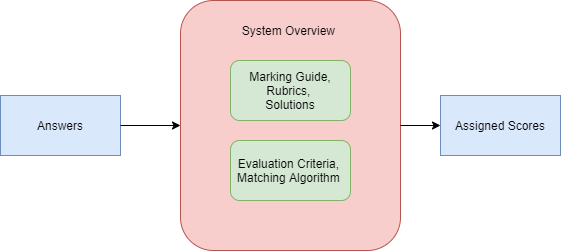

## Motivation 



*   To reduce the load of instructor
*   To make the assessment evaluation automated 





## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Mount Google for Reading Files

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/hackthon/data_math.csv")
print(df)

          ID  Problem                              Answer  Score
0          0        1                                  -1      5
1          1        1                                  -4      0
2          2        1                                   5      0
3          3        1                                   5      0
4          4        1                                   4      0
...      ...      ...                                 ...    ...
19995  19995        4  ['f(-x)g(-x)=-f(x)g(x)', 'either']      4
19996  19996        4     ['f(-x)g(-x)=-f(x)g(x)', 'odd']      4
19997  19997        4   ['f(-x)g(-x)=f(x)g(x)', 'either']      0
19998  19998        4    ['f(-x)g(-x)=-f(x)g(x)', 'even']      4
19999  19999        4  ['f(-x)g(-x)=-f(x)g(x)', 'either']      4

[20000 rows x 4 columns]


In [ ]:
!pip install python-docx 
import docx

     |████████████████████████████████| 5.6MB 25.0MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-cp37-none-any.whl size=184508 sha256=5c7f64fd08d2571db0d8aec7e2fbfb1b5b3b68fe65616b9e3e76c76fb3a2cd71
  Stored in directory: /root/.cache/pip/wheels/a6/90/f1/a7cb70b38633ae04e7fb963b1c70f63fd6fc01c075b8230adc
Successfully built python-docx


In [ ]:
doc = docx.Document('/content/drive/MyDrive/hackthon/Problem_math_description.docx')

In [ ]:
#problems = 
#print(doc.paragraphs[0].text)
for  x in doc.paragraphs:
  #print(x.text)
  part= x.text.split(':')
  for y in part:
    #print(y)
    solutions= y.split(';')
    for z in solutions:
      print(z)
      # create a dataframe 

Problem1

If $3p+4q=8$ and $4p+3q=13$, what is $q$ equal to? (Total Points 5)

Rubric
 q=-1(5)
 others(0)

Answer
 q=-1(5)

Problem 2
Evaluate $i^6+i^{16}+i^{-26}$. (Total Points 5)

Rubric
 i^6=-1(1)
 i^{16}=1(1)
 i^{-26}=-1(1)

Answer
 -1(5)

Problem3
 The lengths of the three sides of a triangle are $7$, $x+4$ and $2x+1$.  The perimeter of the triangle is 36.  What is the length of the longest side of the triangle?

Rubric
 7+x+4+2x+1=36 or 3x+12=36 or 3x=24 or x=8 (3)
        x+4=12 2x+1=17 (5)
Answer
 17

Problem4
 Let $f(x)$ be an even function, and let $g(x)$ be an odd function.  Is $f(x) g(x)$ even, odd, or neither? "odd\", \"even\", or \"neither\". (total Points 5)

Rubric
 f(-x)g(-x)=-f(x)g(x) (4)
 odd (1)

Answer
 odd






In [ ]:
#df.Answer

In [ ]:
#len(set(df.Answer))


In [ ]:
#df.loc[df["Problem"]==1]

In [ ]:
#df.loc[df['favorite_color'] == 'yellow']
#df2=df.loc[df["Problem"]==2]

In [ ]:
#df2.loc[df2['Score']==5]

####One Hot Encoding to the Dataset

In [ ]:
df_new=pd.get_dummies(df)
df_new

,ID,Problem,Score,Answer_-1,Answer_-2,Answer_-3,Answer_-4,Answer_-5,Answer_0,Answer_1,Answer_2,Answer_3,Answer_4,Answer_5,"Answer_['3x+12=36', '']","Answer_['3x+12=36', 'x+4=12, 2x+1=17']","Answer_['3x=24', '']","Answer_['3x=24', 'x+4=12, 2x+1=17']","Answer_['7+x+4+2x+1=36', '']","Answer_['7+x+4+2x+1=36', 'x+4=12, 2x+1=17']","Answer_['f(-x)g(-x)=-f(x)g(x)', 'either']","Answer_['f(-x)g(-x)=-f(x)g(x)', 'even']","Answer_['f(-x)g(-x)=-f(x)g(x)', 'odd']","Answer_['f(-x)g(-x)=f(x)g(x)', 'either']","Answer_['f(-x)g(-x)=f(x)g(x)', 'even']","Answer_['f(-x)g(-x)=f(x)g(x)', 'odd']","Answer_['i^6=-1', '-1']","Answer_['i^6=-1', '-2']","Answer_['i^6=-1', '-3']","Answer_['i^6=-1', '0']","Answer_['i^6=-1', '1']","Answer_['i^6=-1', '2']","Answer_['i^6=-1', '3']","Answer_['i^6=-1', 'i^{16}=1', '-1']","Answer_['i^6=-1', 'i^{16}=1', '-2']","Answer_['i^6=-1', 'i^{16}=1', '-3']","Answer_['i^6=-1', 'i^{16}=1', '0']","Answer_['i^6=-1', 'i^{16}=1', '1']","Answer_['i^6=-1', 'i^{16}=1', '2']","Answer_['i^6=-1', 'i^{16}=1', '3']",...,"Answer_['i^{16}=1', 'i^{26}=-1', 'i^6=-1', '1']","Answer_['i^{16}=1', 'i^{26}=-1', 'i^6=-1', '2']","Answer_['i^{16}=1', 'i^{26}=-1', 'i^6=-1', '3']","Answer_['i^{26}=-1', '-1']","Answer_['i^{26}=-1', '-2']","Answer_['i^{26}=-1', '-3']","Answer_['i^{26}=-1', '0']","Answer_['i^{26}=-1', '1']","Answer_['i^{26}=-1', '2']","Answer_['i^{26}=-1', '3']","Answer_['i^{26}=-1', 'i^6=-1', '-1']","Answer_['i^{26}=-1', 'i^6=-1', '-2']","Answer_['i^{26}=-1', 'i^6=-1', '-3']","Answer_['i^{26}=-1', 'i^6=-1', '0']","Answer_['i^{26}=-1', 'i^6=-1', '1']","Answer_['i^{26}=-1', 'i^6=-1', '2']","Answer_['i^{26}=-1', 'i^6=-1', '3']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '-1']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '-2']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '-3']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '0']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '1']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '2']","Answer_['i^{26}=-1', 'i^6=-1', 'i^{16}=1', '3']","Answer_['i^{26}=-1', 'i^{16}=1', '-1']","Answer_['i^{26}=-1', 'i^{16}=1', '-2']","Answer_['i^{26}=-1', 'i^{16}=1', '-3']","Answer_['i^{26}=-1', 'i^{16}=1', '0']","Answer_['i^{26}=-1', 'i^{16}=1', '1']","Answer_['i^{26}=-1', 'i^{16}=1', '2']","Answer_['i^{26}=-1', 'i^{16}=1', '3']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '-1']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '-2']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '-3']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '0']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '1']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '2']","Answer_['i^{26}=-1', 'i^{16}=1', 'i^6=-1', '3']","Answer_['x=8', '']","Answer_['x=8', 'x+4=12, 2x+1=17']"
0,0,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Plot

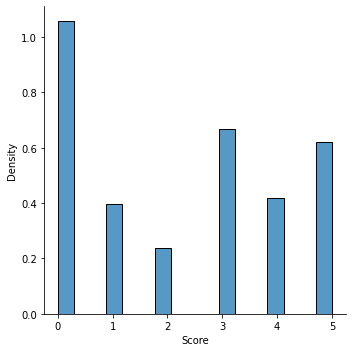

In [ ]:
sns.displot(df,x="Score",stat="density")

##### Do we need to do Data augementation for the minority class(imbalanced dataset)?

In [ ]:
X=df_new.drop('Score',1)
y=df_new['Score']

###Split dataset to 70% Traning and 30% Test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

##Random Forest

In [ ]:
#len(y_train)

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 rfc=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [ ]:
print("\n Random Forest Classification_report\n", classification_report(y_test,rfc.predict(X_test)))


 Random Forest Classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1843
           1       1.00      1.00      1.00       726
           2       1.00      1.00      1.00       417
           3       1.00      1.00      1.00      1170
           4       1.00      1.00      1.00       744
           5       1.00      1.00      1.00      1100

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



100% Accuracy!

##SVM

In [ ]:
from sklearn.svm import SVC
model_svc=SVC(class_weight="balanced").fit(X_train,y_train)

In [ ]:
predicts=model_svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("\n SVM Classification Report\n",classification_report( y_test,predicts))


 SVM Classification Report
               precision    recall  f1-score   support

           0       0.91      0.71      0.79      1843
           1       0.00      0.00      0.00       726
           2       0.27      0.99      0.42       417
           3       0.51      0.27      0.35      1170
           4       0.47      1.00      0.64       744
           5       0.51      0.40      0.45      1100

    accuracy                           0.53      6000
   macro avg       0.45      0.56      0.44      6000
weighted avg       0.55      0.53      0.50      6000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Perceptron

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_percp=SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).fit(X_train,y_train)
sgd=SGDClassifier().fit(X_train,y_train)
print(classification_report(y_test,sgd.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.01      0.02      1843
           1       0.00      0.00      0.00       726
           2       0.07      1.00      0.13       417
           3       0.00      0.00      0.00      1170
           4       0.00      0.00      0.00       744
           5       0.00      0.00      0.00      1100

    accuracy                           0.07      6000
   macro avg       0.16      0.17      0.03      6000
weighted avg       0.28      0.07      0.02      6000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting of conventional models vs accuracy

([<matplotlib.axis.YTick at 0x7fe97625ce90>,
 [Text(0, 0, 'SVM'), Text(0, 0, 'RF'), Text(0, 0, 'Perceptron')])

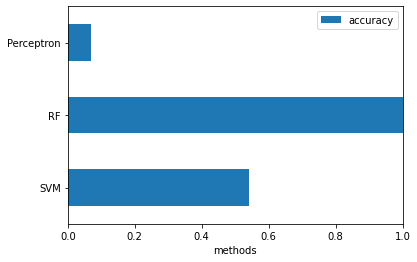

In [ ]:
methods=["SVM","RF","Perceptron"]
accuracy=[0.54,1,0.07]
y_pos = np.arange(len(methods))

MA=pd.DataFrame(list(zip(methods,accuracy)),columns=["methods","accuracy"])
MA.plot.barh()
plt.xlabel("methods")
plt.xlim(0,1)
plt.yticks(y_pos, methods)

####RF has the best accuracy

# New section